# US Housing Market Analysis: Demand

Author: Sirjana Bhatta & Mikayla Humiston
The purpose of creating this project is to analyze the U.S. housing market from 2003 to 2023.

# Data Overview


The source of data was taken from Kaggle, https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us
Files: Demand.csv and Supply.csv

# Importing the required libraries.

In [31]:
import pandas as pd
import pyodbc
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Importing the dataset into a Jupyter notebook

In [32]:
df = pd.read_csv('Data/demand.csv')

# Displaying only the first 5 rows

In [33]:
print(df.head(5))

        DATE   CSUSHPISA  MORTGAGE30US    UMCSENT  INTDSRUSM193N   MSPUS  \
0   1/1/2003  129.321000      5.840769  79.966667       2.250000  186000   
1   1/4/2003  131.756000      5.506923  89.266667       2.166667  191800   
2   1/7/2003  135.013000      6.033846  89.300000       2.000000  191900   
3  1/10/2003  138.835667      5.919286  91.966667       2.000000  198800   
4   1/1/2004  143.298667      5.597500  98.000000       2.000000  212700   

         GDP  
0  11174.129  
1  11312.766  
2  11566.669  
3  11772.234  
4  11923.447  


# Describing dataset

In [34]:
print(df.describe())

        CSUSHPISA  MORTGAGE30US    UMCSENT  INTDSRUSM193N          MSPUS  \
count   80.000000     81.000000  81.000000      74.000000      81.000000   
mean   180.658712      4.705420  82.149794       1.961712  281104.938272   
std     41.410501      1.114588  12.408088       1.732885   68121.518078   
min    129.321000      2.760714  56.100000       0.250000  186000.000000   
25%    148.204500      3.822308  73.866667       0.750000  228100.000000   
50%    172.270000      4.440000  82.966667       1.041667  258400.000000   
75%    196.770917      5.768462  93.066667       2.562500  318400.000000   
max    303.422667      6.664615  98.933333       6.250000  479500.000000   

                GDP  
count     81.000000  
mean   17298.487852  
std     3851.890323  
min    11174.129000  
25%    14448.882000  
50%    16629.050000  
75%    19894.750000  
max    26465.865000  


# Displaying the complete dataset using the to_string() method

In [35]:
print(df.to_string())

         DATE   CSUSHPISA  MORTGAGE30US    UMCSENT  INTDSRUSM193N   MSPUS        GDP
0    1/1/2003  129.321000      5.840769  79.966667       2.250000  186000  11174.129
1    1/4/2003  131.756000      5.506923  89.266667       2.166667  191800  11312.766
2    1/7/2003  135.013000      6.033846  89.300000       2.000000  191900  11566.669
3   1/10/2003  138.835667      5.919286  91.966667       2.000000  198800  11772.234
4    1/1/2004  143.298667      5.597500  98.000000       2.000000  212700  11923.447
5    1/4/2004  148.209000      6.106154  93.333333       2.083333  217600  12112.815
6    1/7/2004  152.716667      5.894286  95.600000       2.500000  213500  12305.307
7   1/10/2004  157.535333      5.736154  93.866667       3.000000  228800  12527.214
8    1/1/2005  163.481333      5.768462  94.066667       3.500000  232500  12767.286
9    1/4/2005  169.347333      5.708462  90.200000       4.000000  233700  12922.656
10   1/7/2005  174.580000      5.763846  87.500000       4.500000

# Data cleaning by filtering out missing/null values and counting null value 

In [36]:
print(df.isnull().sum())

DATE             0
CSUSHPISA        1
MORTGAGE30US     0
UMCSENT          0
INTDSRUSM193N    7
MSPUS            0
GDP              0
dtype: int64


# Eliminating null values by using dropna() method.

In [56]:
df.dropna(inplace=True)

# Verifying if null values are dropped after using dropna() method

In [38]:
print(df.isnull().sum())

DATE             0
CSUSHPISA        0
MORTGAGE30US     0
UMCSENT          0
INTDSRUSM193N    0
MSPUS            0
GDP              0
dtype: int64


# Performing data cleaning by identifying and handling duplicate values.

In [39]:
df.duplicated().sum()

0

# Checking Data types

In [40]:
print(df.dtypes)

DATE              object
CSUSHPISA        float64
MORTGAGE30US     float64
UMCSENT          float64
INTDSRUSM193N    float64
MSPUS              int64
GDP              float64
dtype: object


# Save cleaned data to a new CSV file

In [41]:
df.to_csv('Data/cleaned_dataset.csv', index=False)

# Storing the cleaned data in an SQL database.

In [46]:
conn_str = 'mssql+pyodbc://sirjanabhatta06\SQLEXPRESS/Project_database?driver=ODBC+Driver+17+for+SQL+Server'

In [47]:
engine = create_engine(conn_str)

In [48]:
df = pd.read_csv('Data/cleaned_dataset.csv')

In [49]:
df.to_sql(name='demand_table', con=engine,if_exists='replace',index=False)

-1

# Retrieving data from an SQL query result.

In [50]:
file_path = 'Scripts/Project_Demand_Query.sql'
with open(file_path, 'r') as file:
    sql_query = file.read()


In [51]:
engine.dispose()

# Displaying the results from an SQL query.

In [52]:
df_result = pd.read_sql(sql_query, con=engine)

In [53]:
print(df_result)

    year  Average_GDP  Average_INTDSRUSM193N_Rate  Average_Median_Sales_Price  \
0   2003  11456.44950                    2.104167                      192125   
1   2004  12217.19575                    2.395833                      218150   
2   2005  13039.19700                    4.250000                      236550   
3   2006  13815.58300                    6.020833                      243750   
4   2007  14474.22700                    5.791667                      244950   
5   2008  14769.86150                    2.166667                      229550   
6   2009  14478.06675                    0.500000                      215650   
7   2010  15048.97000                    0.729167                      222700   
8   2011  15599.73175                    0.750000                      224900   
9   2012  16253.97000                    0.750000                      244400   
10  2013  16843.19575                    0.750000                      266225   
11  2014  17550.68775       

# Creating visualizations with Matplotlib

# Visualization of Yearly Average GDP

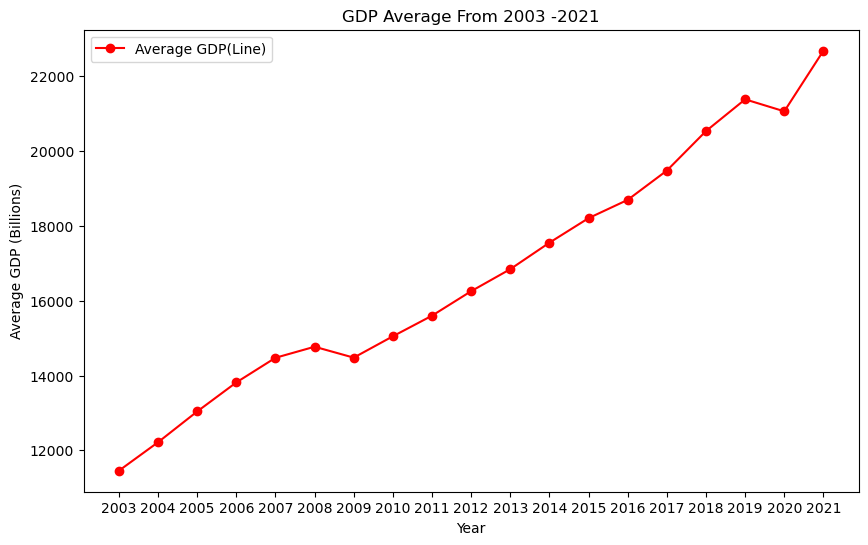

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df_result['year'], df_result['Average_GDP'], label='Average GDP(Line)', color='Red', marker='o')
plt.title('GDP Average From 2003 -2021')
plt.xlabel('Year')
plt.ylabel('Average GDP (Billions)')
plt.xticks(range(2003,2022))
plt.legend()
plt.show()

To conclude, there is sharp incasres in GDP from 2003 to 2007. 

# Visualization of Yearly Average Interest Rate

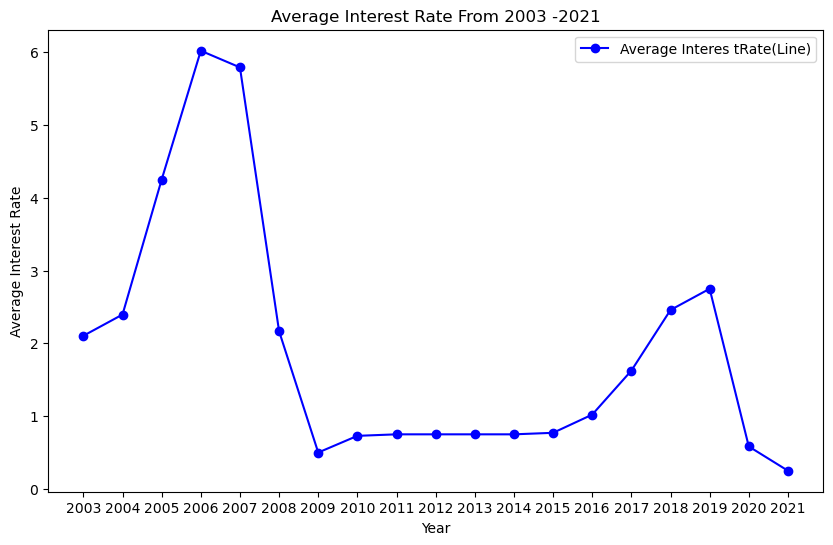

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(df_result['year'], df_result['Average_INTDSRUSM193N_Rate'], label='Average Interes tRate(Line)', color='Blue', marker='o')
plt.title('Average Interest Rate From 2003 -2021')
plt.xlabel('Year')
plt.ylabel('Average Interest Rate')
plt.xticks(range(2003,2022))
plt.legend()
plt.show()

# Visualization of Yearly Median Sales Price

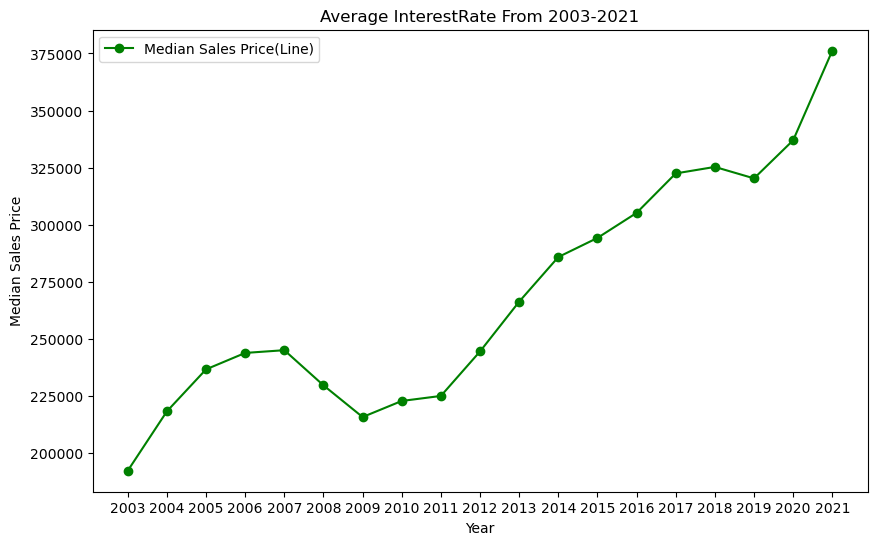

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(df_result['year'], df_result['Average_Median_Sales_Price'], label='Median Sales Price(Line)', color='Green', marker='o')

plt.title('Average Median Sale Price From 2003-2021')
plt.xlabel('Year')
plt.ylabel('Median Sales Price')
plt.xticks(range(2003,2022))
plt.legend()
plt.show()

# Supply DataSet

In [104]:
import pandas as pd
import pyodbc
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


# Importing Supply dataset into a Jupyter notebook

In [148]:
df_supply = pd.read_csv("Data/supply.csv")

# Displaying only the first 5 rows

In [150]:
print(df_supply.head(5))

         DATE    CSUSHPISA       MSACSR       PERMIT    TLRESCONS  \
0  01-01-2003      129.321          4.2  1806.333333  421328.6667   
1  01-04-2003      131.756  3.833333333  1837.666667  429308.6667   
2  01-07-2003      135.013  3.633333333  1937.333333       458890   
3  01-10-2003  138.8356667  3.966666667  1972.333333  491437.3333   
4  01-01-2004  143.2986667          3.7  1994.666667  506856.3333   

  EVACANTUSQ176N  
0          14908  
1          15244  
2          15614  
3          15654  
4          15895  


# Describing dataset

In [106]:
print(df_supply.describe())

              DATE CSUSHPISA MSACSR       PERMIT    TLRESCONS EVACANTUSQ176N
count           82        82     82           82           82             82
unique          82        81     67           81           82             81
top     01-01-2003         .    4.8  1455.333333  421328.6667          16814
freq             1         2      3            2            1              2


In [107]:
print(df_supply.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            82 non-null     object
 1   CSUSHPISA       82 non-null     object
 2   MSACSR          82 non-null     object
 3   PERMIT          82 non-null     object
 4   TLRESCONS       82 non-null     object
 5   EVACANTUSQ176N  82 non-null     object
dtypes: object(6)
memory usage: 4.0+ KB
None


# Data cleaning by filtering out missing/null values and counting null value

In [109]:
print(df_supply.isnull().sum())

DATE              0
CSUSHPISA         0
MSACSR            0
PERMIT            0
TLRESCONS         0
EVACANTUSQ176N    0
dtype: int64


# Displaying the complete dataset using the to_string() method¶

In [110]:
print(df_supply.to_string())

          DATE    CSUSHPISA       MSACSR       PERMIT    TLRESCONS EVACANTUSQ176N
0   01-01-2003      129.321          4.2  1806.333333  421328.6667          14908
1   01-04-2003      131.756  3.833333333  1837.666667  429308.6667          15244
2   01-07-2003      135.013  3.633333333  1937.333333       458890          15614
3   01-10-2003  138.8356667  3.966666667  1972.333333  491437.3333          15654
4   01-01-2004  143.2986667          3.7  1994.666667  506856.3333          15895
5   01-04-2004      148.209          3.9         2080  526483.3333          16079
6   01-07-2004  152.7166667          4.3  2069.666667       552939          15656
7   01-10-2004  157.5353333          4.1         2086  561413.3333          15361
8   01-01-2005  163.4813333  4.266666667         2105  590790.3333          15748
9   01-04-2005  169.3473333  4.266666667  2137.666667       611957          16061
10  01-07-2005       174.58  4.466666667  2228.333333  642273.6667          15883
11  01-10-2005  

# Performing data cleaning by identifying and handling duplicate values.

In [151]:
df_supply.drop_duplicates(inplace=True)

# Data Cleaning by droping period(.)

In [120]:

df_supply.drop(df_supply[df_supply['DATE'].str.contains('-2023')].index, inplace=True)

# Checking Data types

In [121]:
print(df_supply.dtypes)

DATE              object
CSUSHPISA         object
MSACSR            object
PERMIT            object
TLRESCONS         object
EVACANTUSQ176N    object
dtype: object


# Save cleaned data to a new CSV file

In [122]:
df_supply.to_csv('Data/cleaned_supply.csv', index=False)

# # Storing the cleaned data in an SQL database.

In [123]:
conn_str_supply = 'mssql+pyodbc://sirjanabhatta06\SQLEXPRESS/Project_database?driver=ODBC+Driver+17+for+SQL+Server'

In [124]:
engine=create_engine(conn_str_supply)

In [126]:
df_supply.to_sql(name='supply_table', con=engine, if_exists='replace', index=False)

-1

# Retrieving data from an SQL query result.

In [130]:
file_path = 'Scripts/Project_Supply_Query.sql'  
with open(file_path, 'r') as file:
    sql_query = file.read()

In [157]:
df_supply = pd.read_sql(sql_query, con=engine)

# Displaying the results from an SQL query.

In [158]:
print(df_supply)

    year  Average_home_price_index  Average_monthly_new_house_supply  \
0   2003                133.731417                          3.908333   
1   2004                150.439917                          4.000000   
2   2005                171.737000                          4.450000   
3   2006                183.447583                          6.433333   
4   2007                179.918667                          8.383333   
5   2008                164.057750                         10.675000   
6   2009                148.544583                          9.033333   
7   2010                144.673333                          8.000000   
8   2011                139.259167                          6.583333   
9   2012                140.994167                          4.758333   
10  2013                154.519750                          4.741667   
11  2014                164.699167                          5.475000   
12  2015                172.182583                          5.16

# Creating visualizations with Matplotlib

 # Visualization of Yearly Average Home Price Index 

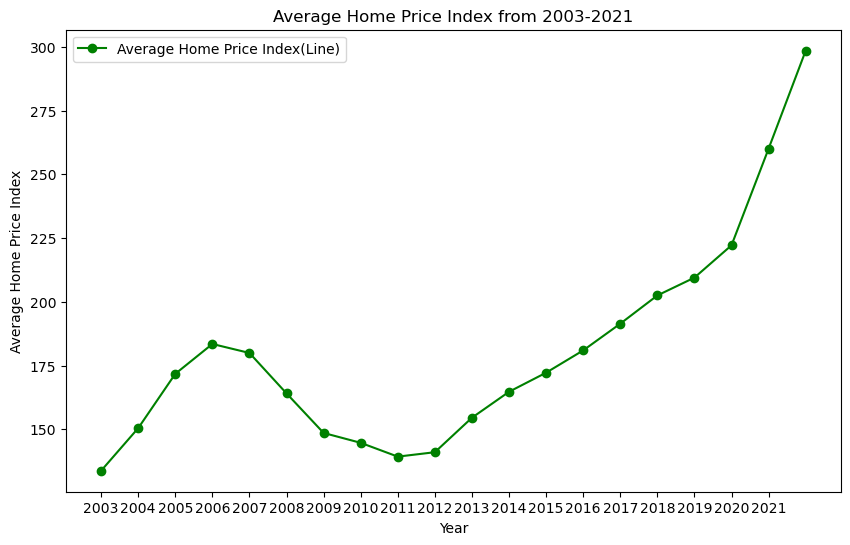

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(df_supply['year'], df_supply['Average_home_price_index'], label='Average Home Price Index(Line)', color='Green', marker='o')
plt.title('Average Home Price Index from 2003-2021')
plt.xlabel('Year')
plt.ylabel('Average Home Price Index')
plt.xticks(range(2003,2022))
plt.legend()
plt.show()

# Visualization of Yearly Average New House Supply

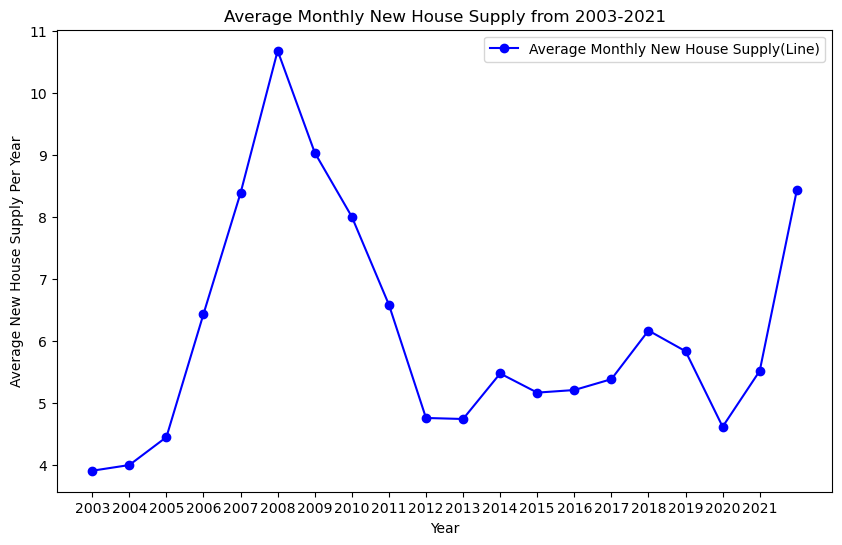

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(df_supply['year'], df_supply['Average_monthly_new_house_supply'], label='Average Monthly New House Supply(Line)', color='Blue', marker='o')
plt.title('Average Monthly New House Supply from 2003-2021')
plt.xlabel('Year')
plt.ylabel('Average New House Supply Per Year')
plt.xticks(range(2003,2022))
plt.legend()
plt.show()

 # Visualization of Yearly Average Residential Construction Spending Over Time

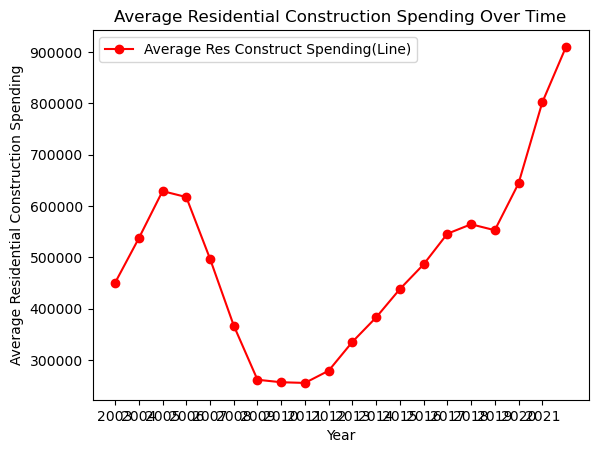

In [147]:

plt.plot(df_supply['year'], df_supply['Average_res_construct_spending'], label='Average Res Construct Spending(Line)', color='Red', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Residential Construction Spending')
plt.title('Average Residential Construction Spending Over Time')
plt.xticks(range(2003,2022))
plt.legend()
plt.show()
